> **Data Analytics**: Welcome to the Investigate a Dataset project! Most people can understand the visualizations, as 40% of the people can answer basic questions about the information provided on the record visualizations. Therefore, when providing information in the form of linear charts, people show a good understanding of the plotsand provide accurate forecasts in this project..

# Project: Analysis of WeRateDogs

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
   - [Visual Assessment](#visual)
   - [Programmatic Assessment](#programmatic)
- [Cleaning data](#clean)
- [Exploratory Data Analysis](#visualization)

<a id='intro'></a>
## Introduction

Over thousands of years, dogs helped humans hunt and manage livestock, guarded home and farm, and played critical roles in major wars. The contrast of talent and apparent patterns along with emotional contact between dogs and humans created more than 350 distinct breeds, each of which is A closed reproductive clan that reflects a set of specific characteristics. In this project, three sets of data are provided from this data that I needed to answer the questions like to find the most common breed among dog breeds and what are the best species and what is the public opinion to distinguish the breed by society? Are there dogs that are distinguished because of their breeds, etc.

- In this research, it is necessary to focus on rare assets to preserve them and can be cross-breeded to find a strain that has the desired genetic traits for many species.
- Neglect of dogs with aggressive and non-coexisting characteristics with members of society who are of low rank
- Determine which dogs are the most admired of all years? And the best breed of dogs that achieved admiration for every year? Until an investment project is made in husbandry
- Establishing media programs that determine the most important advantages and characteristics of each type of dog for the purpose of profit and the public's buying
- We identify unwanted dogs that cannot compete in the market for demand and supply
- Taking a random sample that determines the ability of dogs to change while providing special meals
- The necessity of analyzing the rapid learning ability of dog samples under constant observation and observation

The data I needed to answer these questions is spread out in three different data sets as the data is not arranged very well and needs to be arranged and cleaned:
- **Enhanced Twitter Archive**
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything.
- **Data via the Twitter API**
retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. 
- **Image Predictions File programmatically from a URL**
I download every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs

<a id='gather'></a>
## Gathering data

We must collect three sets of data to fill in the missing values and format them in one set, so we try to download the data in the file and import it into the work environment Jupyter notebook, also we will download the data set from a website (to predict images via the neural network) and also get the data from the API Of Twitter where the API enables us to access data programmatically through applications where instead of allowing Twitter to access the site’s database, it provides programmers the API can access some of the data that we will need in the process of data analysis

In [2]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json 

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# sort data set
twitter_archive.sort_values('timestamp')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:
# Requests allows you to send HTTP/1.1 requests extremely easily. 
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
    
#Read a comma-separated values (csv) file into DataFrame.
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [5]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [63]:
import sys
!{sys.executable} -m pip install tweepy

  Using cached tweepy-3.8.0-py2.py3-none-any.whl (28 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)


In [112]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'a5nULWSaQ2y185Vptjb5c5PtG'
consumer_secret = 'CAacwvFiZLewKkDJ1T4UTygSxlkvEYyAFjUssXACX5yYKPO9HT'
access_token = '1246128220430372865-jd9klrAzjZMmP7MEN5kHE4j1duv65n'
access_secret = 'bk9eraK7uQmMhws4bvvR86XOJZrd6zBCZi3rQLkI0wTG4'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify = True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256


KeyboardInterrupt: 

In [113]:
data = list()
# Read file handler and Read line by line
fh = open('tweet-json.txt', 'r')
line = fh.readline()

while line:
    tweet_dict = json.loads(line.strip())# Strips the newline character and load JSON line
    #JSON Data is convert JSON line to dict
    data_row = dict((k, tweet_dict[k]) for k in ['id', 'favorite_count', 'retweet_count'])
    data.append(data_row)
    line = fh.readline()
tweet_additional = pd.DataFrame.from_dict(data)

In [114]:
for col in tweet_additional.columns:
    print(col)

id
favorite_count
retweet_count


By looking at these sources, we find that the data are representative for the data analyst, as they require arrangement and cleaning
After importing the Assessement

<a id='assess'></a>
## Assessing data

At this stage, we will not explore the data set, but we will make sure that the data makes the data analysis process easy later as we search for the quality of the data and arrange them. All low-quality data is deleted and chaotic data is arranged.

- Dirty data, also known as low quality data. Low quality data has content issues.
- Messy data, also known as untidy data. Untidy data has 

**data quality issues include:**

Quality issues are issues with content, like inaccurate or duplicate data. 


- Missing value.(completeness)
- drop many variables.(completeness)
- Change the non-descriptive columns.(validity)
- combine 'doggo', 'floofer', 'pupper', 'puppo' columns.(consistency)
- data duplicates(validity)
- The numerator and denominator columns have unusual values must be deleted,and The numerator must be divided by the denominator, add a column that contains the two columns, and then delete the two columns.(completeness)

**data Tidiness issues include:**

Tidiness issues are structural issues, specifically: each variable must be a column, each observation must be a row, and each type of observational unit must be a table.

- timestamp column must be from datatype date.
- Correct name for twitter archive clean
- Add the 'year', 'month' columns for timestamp column.
- merge columns in image_prediction table in twitter_archive and tweet_additional tables


<a id='visual'></a>
### Visual Assessment

In [126]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [124]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [125]:
tweet_additional

,id,retweet_count,favorite_count
0,666020888022790149,461,2412
1,666020888022790149,461,2412
2,666020888022790149,461,2412
3,666020888022790149,461,2412
4,666020888022790149,461,2412
...,...,...,...
6946,666020888022790149,461,2412
6947,666020888022790149,461,2412
6948,666020888022790149,461,2412
6949,666020888022790149,461,2412


<a id='programmatic'></a>
### Programmatic Assessment

#### Number of tweets in this experiment

In [149]:
twitter_archive.shape

(2356, 17)

In [150]:
image_prediction.shape

(2075, 12)

In [151]:
tweet_additional.shape

(7062, 3)

There a re 2075 rows in the images dataframe and 2356 rows in the archive dataframe.

In [127]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [129]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


> Taking a random sample that determines the ability of dogs to change while providing special meals

In [58]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
749,687818504314159109,https://pbs.twimg.com/media/CYufR8_WQAAWCqo.jpg,1,Lakeland_terrier,0.873029,True,soft-coated_wheaten_terrier,0.060924,True,toy_poodle,0.017031,True
1923,857029823797047296,https://pbs.twimg.com/media/C-TIEwMW0AEjb55.jpg,2,golden_retriever,0.968623,True,Labrador_retriever,0.010325,True,Saluki,0.004148,True
1697,816697700272001025,https://pbs.twimg.com/media/C1V-K63UAAEUHqw.jpg,1,Chihuahua,0.756992,True,Pomeranian,0.052850,True,Maltese_dog,0.047608,True
1740,822489057087389700,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769,True,malamute,0.252706,True,kuvasz,0.157028,True
55,667062181243039745,https://pbs.twimg.com/media/CUHhgvHUAAA4aB0.jpg,1,Chesapeake_Bay_retriever,0.825678,True,vizsla,0.090998,True,kelpie,0.022956,True


**Expected the Most Frequent of the Dog Breed**

> The number of dogs showed their Breed from the golden retriever while Labrador retrieved it was found in second place from the others,It was the breed of dogs that was most popular in the analysis

In [121]:
#The chain of dogs has identical knowledge of the neural network algorithms where it is expected the most frequent of the dog breed
image_prediction['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
restaurant              1
lynx                    1
quilt                   1
African_grey            1
syringe                 1
Name: p1, Length: 378, dtype: int64

<a id='clean'></a>
## Cleaning data

An Assessement of the data was necessary to identify and fix all these problems
Cleaning means working on the assessments that we conducted to improve the quality and arrangement in order to correct the data and remove unnecessary data and remove everything that is not important or wrong data or replace or merge

#### copy data sets

> Before modifying any data, we must create a copy of it so that we can access the original data set later. We can do this using the pandas.copy function.

In [115]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
additional_tweet_clean = tweet_additional.copy()

> #### drop many variables!

**Define**

Multiple columns have already become a problem in the original data set, this has led to the deletion of many variables and the inclusion of variables of interest to the project.


**Code**

###### 'twitter_archive_clean' table 

In [116]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 
                            'retweeted_status_timestamp','retweeted_status_user_id', 'expanded_urls',
                        ],axis=1, inplace = True)

**Test**

In [117]:
for col in twitter_archive_clean.columns: 
    print(col) 

tweet_id
timestamp
text
rating_numerator
rating_denominator
name
doggo
floofer
pupper
puppo


###### 'image_prediction_clean' table 

**Define**

Examination of greater probability when expecting images with the neural network with a true value for examination of dogs only

**Code**

In [118]:
for i in range(len(image_prediction)):
    p =[]
    largest_p = 0
    image_prediction.loc[i].p1_dog and p.append(image_prediction.loc[i].p1_conf)
    image_prediction.loc[i].p2_dog and p.append(image_prediction.loc[i].p2_conf)
    image_prediction.loc[i].p3_dog and p.append(image_prediction.loc[i].p3_conf)
    if p:
        largest_p = max(p)
        for j in range(len(p)):
            if p[j] == largest_p:
                print("The largest number of probability :",j+1)

The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest 

The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest 

The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest 

The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest 

The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest 

The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest 

The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest 

The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest number of probability : 1
The largest 

> Delete unimportant columns

In [119]:
image_prediction_clean.drop(['img_num', 'p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1, inplace = True)

**Test**

In [120]:
image_prediction_clean.head(1)

,tweet_id,jpg_url,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True


> #### Change the non-descriptive columns.

**Define**

Change the column names to the appropriate name in a table

**Code**

In [121]:
image_prediction_clean.rename(columns={'jpg_url': 'ImageUrl', 'p1': 'prediction', 'p1_conf': 'pred_coefficient', 'p1_dog': 'isDog' }, inplace = True)

**Test**

In [122]:
image_prediction_clean.head(1)

,tweet_id,ImageUrl,prediction,pred_coefficient,isDog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True


> #### add stage column for dog types for'doggo', 'floofer', 'pupper', 'puppo'

**Define**

combine columns  `floofer`, `pupper`, `puppo` to one column `stage`

**Code**

In [123]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


In [124]:
# replace the columns 'doggo', 'floofer', 'pupper', 'puppo' replace to 'None' for '' values 
twitter_archive_clean['doggo'].replace('None', '', inplace=True)
twitter_archive_clean['floofer'].replace('None', '', inplace=True)
twitter_archive_clean['pupper'].replace('None', '', inplace=True)
twitter_archive_clean['puppo'].replace('None', '', inplace=True)

# create stage column for merge fours columns into one columns
twitter_archive_clean['stage'] = (twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo'])

# change the column 'stage' for None value agian
#twitter_archive_clean['stage'] = df['stage'].replace('', np.NAN) # replacing '' value to NAN 
twitter_archive_clean['stage'].replace('', 'None', inplace=True)

# drop four columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

**Test**

In [125]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage']

> #### add rating column for rating_numerator and rating_denominator

**Define**

Getting the evaluation rate by dividing the numerator by the denominator

**Code**

In [126]:
# add rate column for merge two columns 
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']
# drop two columns
twitter_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

**Test**

In [127]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,text,name,stage,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,1.3


> #### Checking the null values

In [128]:
twitter_archive_clean.isnull().sum()

tweet_id     0
timestamp    0
text         0
name         0
stage        0
rating       0
dtype: int64

In [129]:
image_prediction_clean.isnull().sum()

tweet_id            0
ImageUrl            0
prediction          0
pred_coefficient    0
isDog               0
dtype: int64

In [130]:
additional_tweet_clean.isnull().sum()

id                0
favorite_count    0
retweet_count     0
dtype: int64

> #### Dropping duplicates

**Define**

Eliminating duplicates will not be identical to two movie at all

**Code**

In [131]:
sum(twitter_archive_clean.duplicated())

0

In [132]:
sum(image_prediction_clean.duplicated())

0

In [133]:
sum(additional_tweet_clean.duplicated())

0

In [134]:
additional_tweet_clean[additional_tweet_clean.id.duplicated()]

,id,favorite_count,retweet_count


In [135]:
additional_tweet_clean.drop_duplicates(inplace=True)

**Test**

In [136]:
additional_tweet_clean.duplicated().sum()

0

> #### Change the data type the timestamp column.

**Define**

`timestamp` column must be from datatype date.

**Code**

In [137]:
twitter_archive_clean.dtypes

tweet_id       int64
timestamp     object
text          object
name          object
stage         object
rating       float64
dtype: object

In [138]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

**Test**

In [139]:
twitter_archive_clean.dtypes

tweet_id                   int64
timestamp    datetime64[ns, UTC]
text                      object
name                      object
stage                     object
rating                   float64
dtype: object

> #### Add the 'year', 'month' columns for timestamp column.

**Define**

Column Arrangement `timestamp` separating the variable into two columns `year` and `month` to include years and months in a separate column.

**Code**

In [140]:
obj = pd.DatetimeIndex(twitter_archive_clean['timestamp'])
twitter_archive_clean['Year'] = obj.year
twitter_archive_clean['Month'] = obj.month
twitter_archive_clean['Month'].replace(1, 'January', inplace=True)
twitter_archive_clean['Month'].replace(2, 'February', inplace=True)
twitter_archive_clean['Month'].replace(3, 'March', inplace=True)
twitter_archive_clean['Month'].replace(4, 'April', inplace=True)
twitter_archive_clean['Month'].replace(5, 'May', inplace=True)
twitter_archive_clean['Month'].replace(6, 'June', inplace=True)
twitter_archive_clean['Month'].replace(7, 'July', inplace=True)
twitter_archive_clean['Month'].replace(8, 'August', inplace=True)
twitter_archive_clean['Month'].replace(9, 'September', inplace=True)
twitter_archive_clean['Month'].replace(10, 'October', inplace=True)
twitter_archive_clean['Month'].replace(11, 'November', inplace=True)
twitter_archive_clean['Month'].replace(12, 'December', inplace=True)

**Test**

In [141]:
twitter_archive_clean.dtypes

tweet_id                   int64
timestamp    datetime64[ns, UTC]
text                      object
name                      object
stage                     object
rating                   float64
Year                       int64
Month                     object
dtype: object

In [142]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,text,name,stage,rating,Year,Month
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,1.3,2017,August


> #### Correct name for twitter archive clean

**Define**

The name is not arranged, and there are small letters that start with texts, and there are capital letters, so we delete all letters. The name begins with a small letter because all letters that start with small letters are data.

**Code**

In [143]:
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('^[a-z]+', 'None')

**Test**

In [144]:
twitter_archive_clean.name.sample(5)

1134    Coleman
473      Dudley
803        None
115        Zoey
1301       None
Name: name, dtype: object

> **merge columns in image_prediction_clean table in twitter_archive_clean and additional_tweet_clean tables**

**Define**

We were unable to merge groups into one group because tweet_id is different in the result

**Code**

In [145]:
image_prediction_clean.set_index('tweet_id')
all_tweet = pd.merge(left=twitter_archive_clean, right=image_prediction_clean, left_index=True, right_index=True,on = ['tweet_id'], how='left')
all_tweet = pd.merge(left=all_tweet, right=additional_tweet_clean, left_index=True, right_index=True, how='left')
all_tweet.to_csv('AllFiles.csv', encoding = 'utf-8')

**Test**

In [146]:
all_tweet.head(1)

,tweet_id,timestamp,text,name,stage,rating,Year,Month,ImageUrl,prediction,pred_coefficient,isDog,id,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,1.3,2017,August,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,8.924206e+17,39467.0,8853.0


<a id='visualization'></a>
## Exploratory Data Analysis

> **Comparing the quality of the best algorithm**

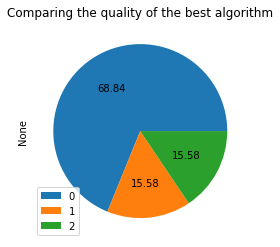

In [218]:
image_prediction[['p1_conf','p2_conf','p2_conf']].sum().plot(kind="pie",autopct='%.2f', labels=['','','',''], title="Comparing the quality of the best algorithm", fontsize=10)
plt.legend(loc=3, labels=image_prediction.index);

The quality of the first algorithm works doubly for the neural network, and this expectation is poor when using other algorithms.

> **number of dogs a dog 'stage' is available**

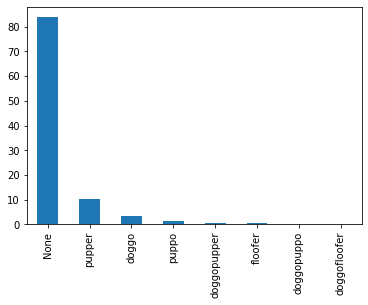

In [148]:
(twitter_archive_clean['stage'].value_counts()/len(twitter_archive_clean) * 100).plot(kind="bar");

By adding the columns and calculating the average, it was found that most dogs do not have `stage` The percentage of puper dogs is approximately ten in total compared to the second doggo in the order by 5 in total.

> **Dataset statistics**

In [150]:
all_tweet.describe()

,tweet_id,rating,Year,pred_coefficient,id,favorite_count,retweet_count
count,2.356000e+03,2356.0,2356.000000,2075.000000,2.354000e+03,2354.000000,2354.000000
mean,7.427716e+17,inf,2015.912139,0.594548,7.426978e+17,8080.968564,3164.797366
std,6.856705e+16,NaN,0.700262,0.271174,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.0,2015.000000,0.044333,6.660209e+17,0.000000,0.000000
25%,6.783989e+17,1.0,2015.000000,0.364412,6.783975e+17,1415.000000,624.500000
50%,7.196279e+17,1.1,2016.000000,0.588230,7.194596e+17,3603.500000,1473.500000
75%,7.993373e+17,1.2,2016.000000,0.843855,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,inf,2017.000000,1.000000,8.924206e+17,132810.000000,79515.000000


- The average retweet count: 3164.797366.
- The average favorite count: 3164.797366.
- The max retweet count: 79515.
- The max favorite count: 132810.

> **common dog name in the dataset**

In [152]:
twitter_archive_clean['name'].value_counts()[:10]

None       854
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Penny       10
Lola        10
Tucker      10
Winston      9
Bo           9
Name: name, dtype: int64

> **The rare and widespread origins of the breed of dogs**

it is necessary to focus on rare assets to preserve them and can be cross-breeded to find a strain that has the desired genetic traits for many species.
Neglect of dogs with aggressive and non-coexisting characteristics with members of society who are of low rank

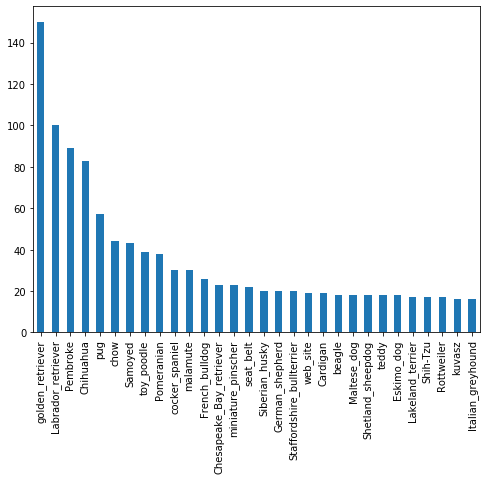

In [164]:
all_tweet['prediction'].value_counts()[:30].plot(kind="bar",figsize=(8,6));

> **dogs is not desirable in the market**

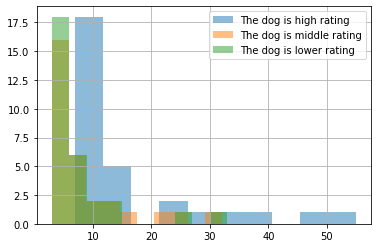

In [167]:
high_rating = all_tweet.rating >=1.2
mid_rating = (all_tweet.rating >= 1.1) & (all_tweet.rating < 1.2)
lower_rating = (all_tweet.rating >= 1.0) & (all_tweet.rating < 1.1)
all_tweet.prediction[high_rating].value_counts()[:30].hist(label='The dog is high rating',alpha=0.5)
all_tweet.prediction[mid_rating].value_counts()[:30].hist(label='The dog is middle rating',alpha=0.5)
all_tweet.prediction[lower_rating].value_counts()[:30].hist(label='The dog is lower rating',alpha=0.5);
plt.legend();

High-rated dogs are acquired more often than medium-sized dogs, while low-rating dogs are unwanted on the market.

> **number of dogs are the most tweet of all years**

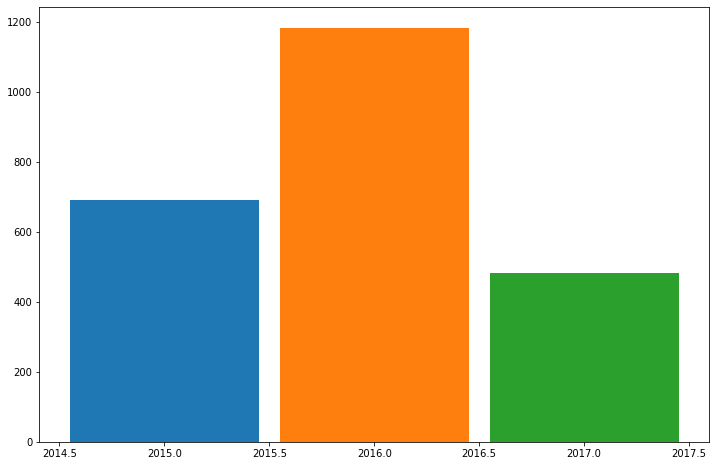

In [70]:
twitter_archive_clean.groupby('Year')['Year'].hist( bins=1, grid=False, figsize=(12,8), zorder=2, rwidth=0.9);

From the number of views, the number of tweets in the tension has increased from 2015, as it peaked in 2016 and then began to decrease in 2017.

> **dogs are the most favorited of all years and each year**

Determine which dogs are the most admired of all years? And the best breed of dogs that achieved admiration for every year? Until an investment project is made in education

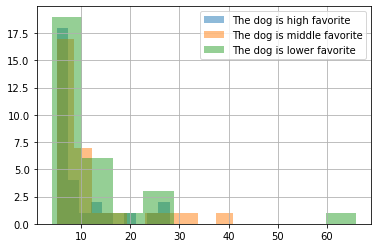

In [181]:
high_favorite_count = all_tweet.favorite_count >=10122
mid_favorite_count = (all_tweet.favorite_count >= 3603.5) & (all_tweet.favorite_count < 10122)
lower_favorite_count = (all_tweet.favorite_count >= 1415) & (all_tweet.favorite_count < 3603.5)
all_tweet.prediction[high_favorite_count].value_counts()[:30].hist(label='The dog is high favorite',alpha=0.5)
all_tweet.prediction[mid_favorite_count].value_counts()[:30].hist(label='The dog is middle favorite',alpha=0.5)
all_tweet.prediction[lower_favorite_count].value_counts()[:30].hist(label='The dog is lower favorite',alpha=0.5);
plt.legend();

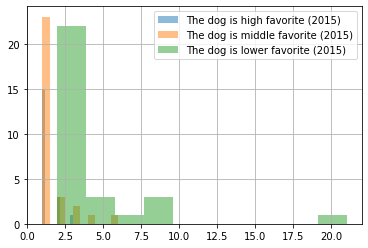

In [219]:
all_tweet.prediction[high_favorite_count][all_tweet['Year']==2015].value_counts()[:30].hist(label='The dog is high favorite (2015)',alpha=0.5)
all_tweet.prediction[mid_favorite_count][all_tweet['Year']==2015].value_counts()[:30].hist(label='The dog is middle favorite (2015)',alpha=0.5)
all_tweet.prediction[lower_favorite_count][all_tweet['Year']==2015].value_counts()[:30].hist(label='The dog is lower favorite (2015)',alpha=0.5);
plt.legend();

> We identify unwanted dogs that cannot compete in the market for demand and supply

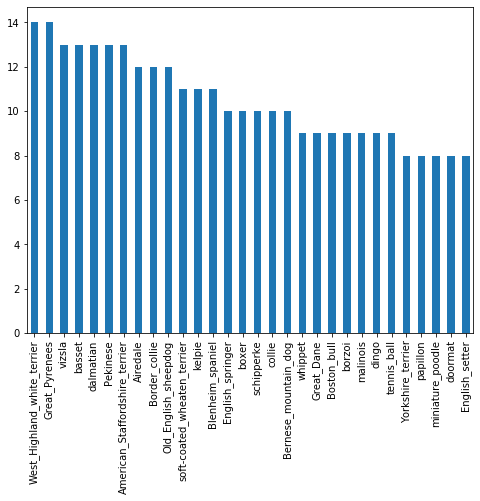

In [200]:
all_tweet['prediction'].value_counts()[30:60].plot(kind="bar",figsize=(8,6));

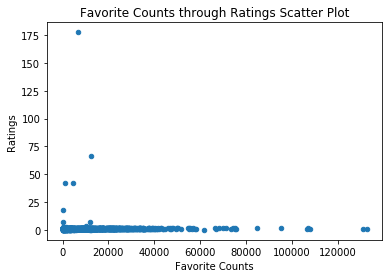

In [204]:
all_tweet.plot(x='favorite_count', y='rating', kind='scatter')
plt.xlabel('Favorite Counts')
plt.ylabel('Ratings')
plt.title('Favorite Counts through Ratings Scatter Plot');

Text(0.5, 1.0, 'Retweet Counts through Ratings Scatter Plot')

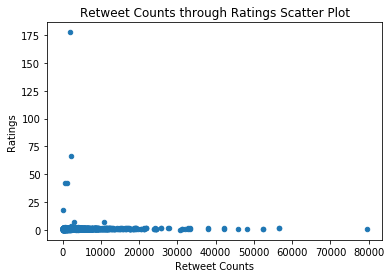

In [205]:
all_tweet.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts through Ratings Scatter Plot')

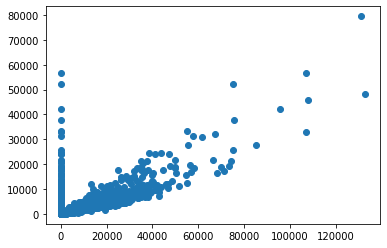

In [206]:
plt.scatter(all_tweet.favorite_count, all_tweet.retweet_count)
plt.show()